In [2]:
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
current = !pwd

In [4]:
current

['/home/USER/Desktop/Adversarial3D/Code']

In [8]:
backgrounds = glob.glob(current[0]+'/outputs_fighter/bg/*/*.jpg') + glob.glob(current[0]+'/outputs_fighter/bg/*/*.png')
backgrounds

['/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/country/country_3.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/country/country_0.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/country/country_1.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/country/country_5.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/country/country_2.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/urban/urban_2.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/urban/urban_3.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/urban/urban_0.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/urban/urban_4.jpg',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/bg/urban/urban_1.jpg']

In [14]:
images = glob.glob(current[0]+'/outputs_fighter/fighter/all/*')
images

['/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/fighter/all/2.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/fighter/all/1.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/fighter/all/0.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/fighter/all/4.png',
 '/home/USER/Desktop/Adversarial3D/Code/outputs_fighter/fighter/all/3.png']

In [10]:
len(backgrounds)

10

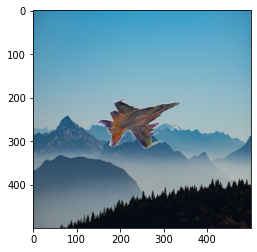

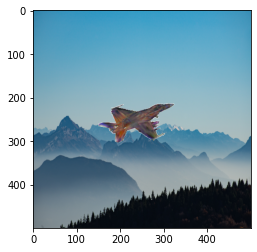

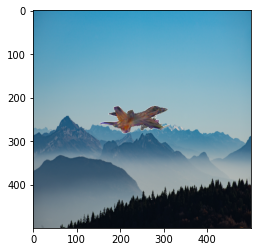

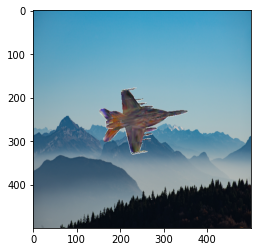

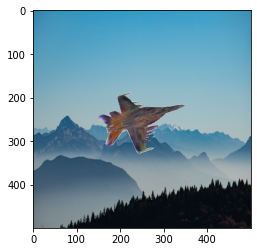

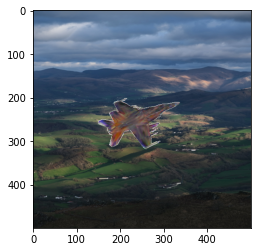

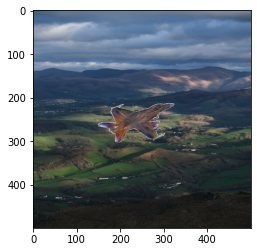

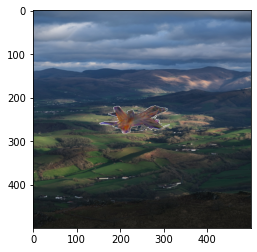

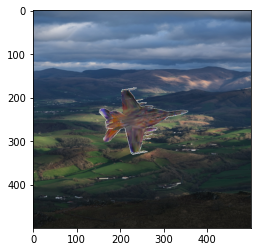

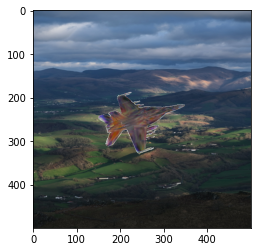

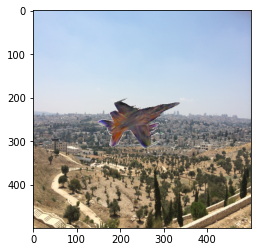

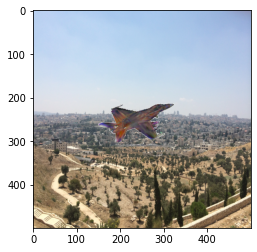

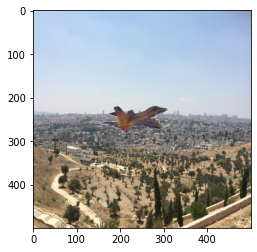

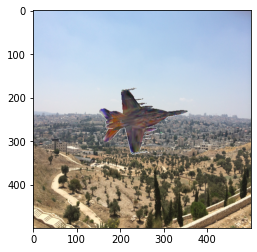

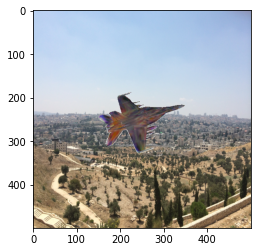

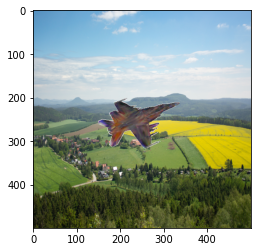

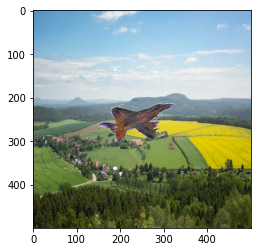

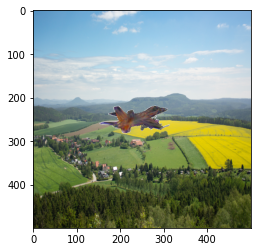

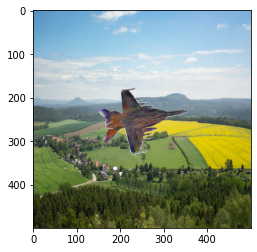

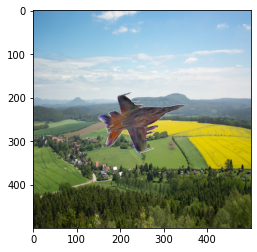

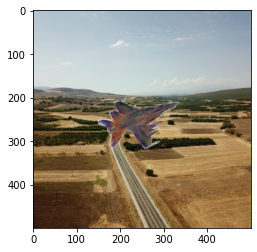

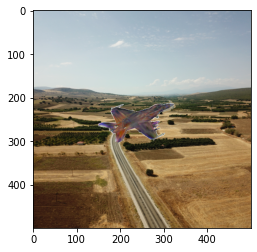

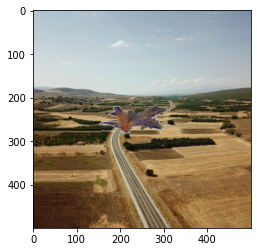

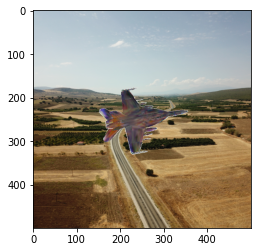

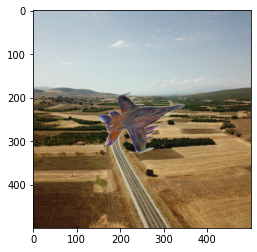

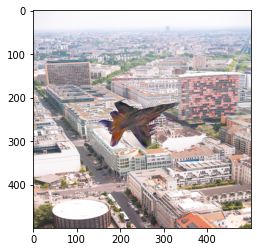

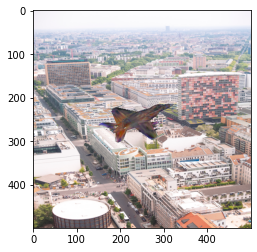

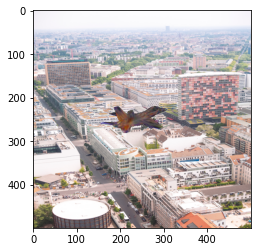

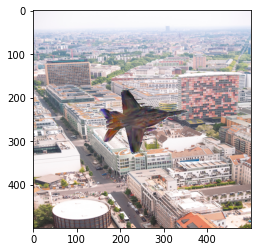

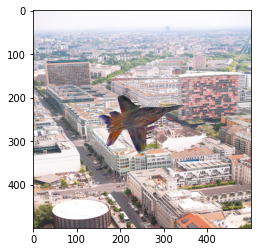

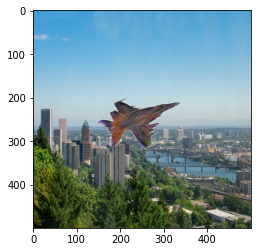

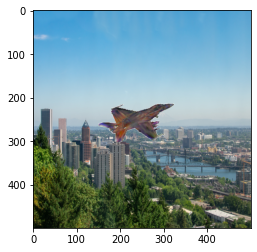

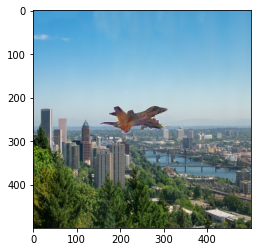

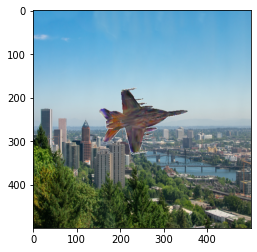

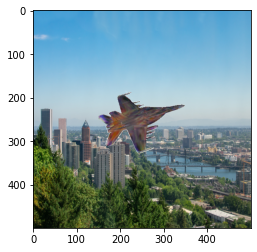

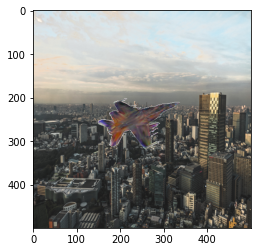

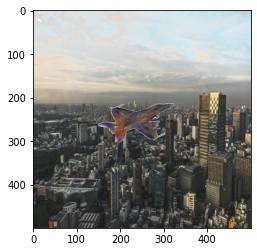

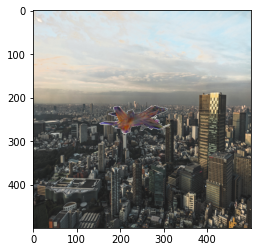

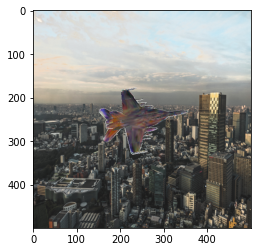

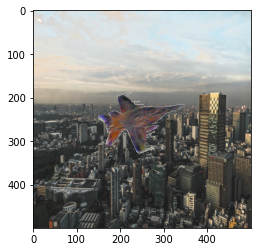

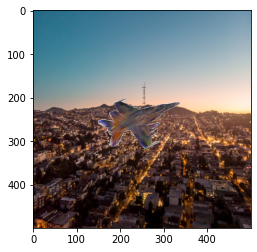

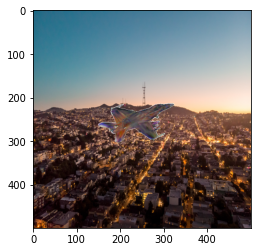

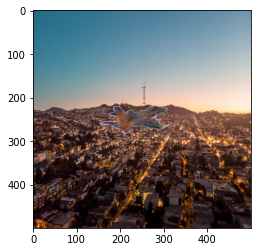

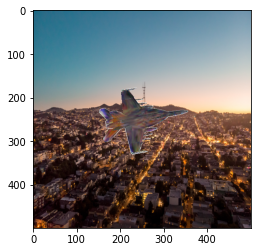

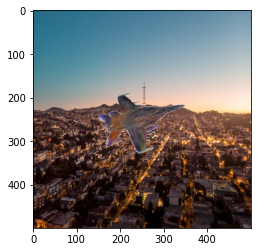

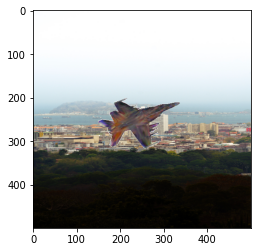

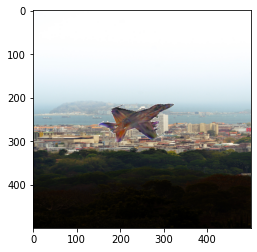

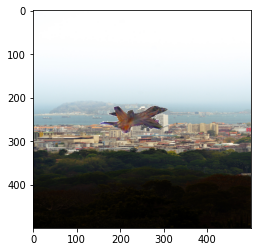

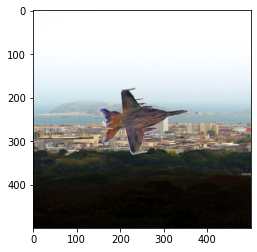

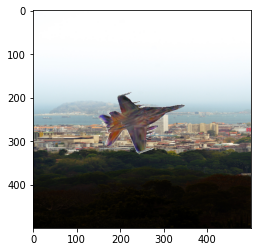

In [15]:
for bg in backgrounds:
    for img in images:
        name  = img.split('/') [-1].split('.')[0]
        label = img.split('/')[8]
        bg_label = bg.split('/')[-1]
        bg0 = np.array(Image.open(bg).resize((500,500)))
        img0 = np.array(Image.open(img).resize((500,500)))
        mask = img0[...,:3] == 255
        new = Image.fromarray((mask).astype(np.uint8)) * bg0 + (1-mask)*img0
        im = Image.fromarray(np.uint8(new))
        im.save(f'{current[0]}/outputs_fighter/deceptive_bg/{label}_{name}_{bg_label}')
        plt.imshow(im)
        plt.show()